# Train RetinaNet (Backbone = ResNet101)

In [1]:
import tensorflow as tf
import numpy as np
from keras_retinanet import models
from keras_retinanet.preprocessing.csv_generator import CSVGenerator
from keras_retinanet.utils.transform import random_transform_generator
from keras_retinanet.utils.image import random_visual_effect_generator
from train_retinanet import create_models, create_callbacks, plot_history

In [2]:
np.random.seed(1) 
tf.random.set_seed(1)

In [3]:
tf.test.is_built_with_cuda()  

True

In [4]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU'))) #print no of GPU device

Num GPUs Available:  1


In [5]:
backbone = models.backbone('resnet101')
weights = backbone.download_imagenet()

In [6]:
train_generator = CSVGenerator(
    csv_data_file='./dataset/train.csv',
    csv_class_file='./dataset/class.csv',
    no_resize = True,
    preprocess_image  = backbone.preprocess_image
)

val_generator = CSVGenerator(
    csv_data_file='./dataset/validation.csv',
    csv_class_file='./dataset/class.csv',
    no_resize = True,
    preprocess_image  = backbone.preprocess_image  
)

In [7]:
lr = 1e-3 
epochs = 50
steps = 400

## Without Data Augmentation

In [8]:
training_model, prediction_model = create_models(backbone_retinanet=backbone.retinanet,
                                          num_classes=1,
                                          weights=weights,
                                          freeze_backbone=True,
                                          lr=lr
                                          )

In [9]:
log_file = './result/retinanet_resnet101_log.csv'
model_path = './result/retinanet_resnet101.h5'
callback = create_callbacks(training_model, prediction_model, val_generator, model_path, log_file)

In [10]:
prediction_model.summary()

Model: "retinanet-bbox"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9408        input_1[0][0]                    
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, None, None, 6 256         conv1[0][0]                      
__________________________________________________________________________________________________
conv1_relu (Activation)         (None, None, None, 6 0           bn_conv1[0][0]                   
_____________________________________________________________________________________

In [11]:
training_model.summary()

Model: "retinanet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9408        input_1[0][0]                    
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, None, None, 6 256         conv1[0][0]                      
__________________________________________________________________________________________________
conv1_relu (Activation)         (None, None, None, 6 0           bn_conv1[0][0]                   
__________________________________________________________________________________________

In [12]:
history = training_model.fit(
                x=train_generator,
                epochs=epochs,
                verbose=1,
                validation_data=val_generator,
                callbacks=callback,
                steps_per_epoch = steps
                )

Epoch 1/50
400/400 [==============================] - ETA: 0s - loss: 3.3848 - regression_loss: 2.5851 - classification_loss: 0.7997WARNING:tensorflow:Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0090s vs `on_test_batch_end` time: 0.0346s). Check your callbacks.


Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:12 Time:  0:00:12
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.1577
mAP: 0.1577

Epoch 00001: mAP improved from -inf to 0.15770, saving model to ./result\retinanet_resnet101.h5
400/400 [==============================] - 59s 147ms/step - loss: 3.3848 - regression_loss: 2.5851 - classification_loss: 0.7997 - val_loss: 2.9198 - val_regression_loss: 2.3621 - val_classification_loss: 0.5576
Epoch 2/50
400/400 [==============================] - ETA: 0s - loss: 2.8904 - regression_loss: 2.1698 - classification_loss: 0.7206

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:10 Time:  0:00:10
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.3347
mAP: 0.3347

Epoch 00002: mAP improved from 0.15770 to 0.33475, saving model to ./result\retinanet_resnet101.h5
400/400 [==============================] - 53s 133ms/step - loss: 2.8904 - regression_loss: 2.1698 - classification_loss: 0.7206 - val_loss: 2.4784 - val_regression_loss: 1.9929 - val_classification_loss: 0.4855
Epoch 3/50
400/400 [==============================] - ETA: 0s - loss: 2.3651 - regression_loss: 1.9010 - classification_loss: 0.4641

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:10 Time:  0:00:10
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.6269
mAP: 0.6269

Epoch 00003: mAP improved from 0.33475 to 0.62691, saving model to ./result\retinanet_resnet101.h5
400/400 [==============================] - 52s 131ms/step - loss: 2.3651 - regression_loss: 1.9010 - classification_loss: 0.4641 - val_loss: 2.0846 - val_regression_loss: 1.7332 - val_classification_loss: 0.3514
Epoch 4/50
400/400 [==============================] - ETA: 0s - loss: 1.9988 - regression_loss: 1.6374 - classification_loss: 0.3614

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:10 Time:  0:00:10
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.6962
mAP: 0.6962

Epoch 00004: mAP improved from 0.62691 to 0.69616, saving model to ./result\retinanet_resnet101.h5
400/400 [==============================] - 54s 135ms/step - loss: 1.9988 - regression_loss: 1.6374 - classification_loss: 0.3614 - val_loss: 1.9014 - val_regression_loss: 1.6012 - val_classification_loss: 0.3002
Epoch 5/50
400/400 [==============================] - ETA: 0s - loss: 1.7959 - regression_loss: 1.4981 - classification_loss: 0.2978

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:10 Time:  0:00:10
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.7065
mAP: 0.7065

Epoch 00005: mAP improved from 0.69616 to 0.70649, saving model to ./result\retinanet_resnet101.h5
400/400 [==============================] - 53s 133ms/step - loss: 1.7959 - regression_loss: 1.4981 - classification_loss: 0.2978 - val_loss: 1.8996 - val_regression_loss: 1.4791 - val_classification_loss: 0.4205
Epoch 6/50
400/400 [==============================] - ETA: 0s - loss: 1.8703 - regression_loss: 1.3914 - classification_loss: 0.4789

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:10 Time:  0:00:10
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.6373
mAP: 0.6373

Epoch 00006: mAP did not improve from 0.70649
400/400 [==============================] - 50s 125ms/step - loss: 1.8703 - regression_loss: 1.3914 - classification_loss: 0.4789 - val_loss: 1.7382 - val_regression_loss: 1.3946 - val_classification_loss: 0.3436
Epoch 7/50
400/400 [==============================] - ETA: 0s - loss: 1.6751 - regression_loss: 1.2799 - classification_loss: 0.3952

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:10 Time:  0:00:10
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.7230
mAP: 0.7230

Epoch 00007: mAP improved from 0.70649 to 0.72297, saving model to ./result\retinanet_resnet101.h5
400/400 [==============================] - 53s 131ms/step - loss: 1.6751 - regression_loss: 1.2799 - classification_loss: 0.3952 - val_loss: 1.6279 - val_regression_loss: 1.3435 - val_classification_loss: 0.2844
Epoch 8/50
400/400 [==============================] - ETA: 0s - loss: 1.4196 - regression_loss: 1.1582 - classification_loss: 0.2614

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:10 Time:  0:00:10
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.7875
mAP: 0.7875

Epoch 00008: mAP improved from 0.72297 to 0.78751, saving model to ./result\retinanet_resnet101.h5
400/400 [==============================] - 52s 130ms/step - loss: 1.4196 - regression_loss: 1.1582 - classification_loss: 0.2614 - val_loss: 1.5330 - val_regression_loss: 1.2734 - val_classification_loss: 0.2596
Epoch 9/50
400/400 [==============================] - ETA: 0s - loss: 1.3263 - regression_loss: 1.0843 - classification_loss: 0.2420

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:10 Time:  0:00:10
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.7802
mAP: 0.7802

Epoch 00009: mAP did not improve from 0.78751
400/400 [==============================] - 50s 125ms/step - loss: 1.3263 - regression_loss: 1.0843 - classification_loss: 0.2420 - val_loss: 1.5011 - val_regression_loss: 1.2261 - val_classification_loss: 0.2750
Epoch 10/50
400/400 [==============================] - ETA: 0s - loss: 1.2470 - regression_loss: 1.0243 - classification_loss: 0.2227

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:10 Time:  0:00:10
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.7812
mAP: 0.7812

Epoch 00010: mAP did not improve from 0.78751
400/400 [==============================] - 50s 125ms/step - loss: 1.2470 - regression_loss: 1.0243 - classification_loss: 0.2227 - val_loss: 1.5485 - val_regression_loss: 1.2988 - val_classification_loss: 0.2496
Epoch 11/50
400/400 [==============================] - ETA: 0s - loss: 1.1518 - regression_loss: 0.9573 - classification_loss: 0.1945

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:10 Time:  0:00:10
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8040
mAP: 0.8040

Epoch 00011: mAP improved from 0.78751 to 0.80403, saving model to ./result\retinanet_resnet101.h5
400/400 [==============================] - 52s 130ms/step - loss: 1.1518 - regression_loss: 0.9573 - classification_loss: 0.1945 - val_loss: 1.3717 - val_regression_loss: 1.1403 - val_classification_loss: 0.2315
Epoch 12/50
400/400 [==============================] - ETA: 0s - loss: 1.1517 - regression_loss: 0.9549 - classification_loss: 0.1968

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:10 Time:  0:00:10
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8033
mAP: 0.8033

Epoch 00012: mAP did not improve from 0.80403
400/400 [==============================] - 50s 125ms/step - loss: 1.1517 - regression_loss: 0.9549 - classification_loss: 0.1968 - val_loss: 1.3514 - val_regression_loss: 1.1152 - val_classification_loss: 0.2362
Epoch 13/50
400/400 [==============================] - ETA: 0s - loss: 0.9982 - regression_loss: 0.8310 - classification_loss: 0.1672

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:10 Time:  0:00:10
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8069
mAP: 0.8069

Epoch 00013: mAP improved from 0.80403 to 0.80692, saving model to ./result\retinanet_resnet101.h5
400/400 [==============================] - 52s 130ms/step - loss: 0.9982 - regression_loss: 0.8310 - classification_loss: 0.1672 - val_loss: 1.3716 - val_regression_loss: 1.1469 - val_classification_loss: 0.2248
Epoch 14/50
400/400 [==============================] - ETA: 0s - loss: 0.9710 - regression_loss: 0.8160 - classification_loss: 0.1550

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:10 Time:  0:00:10
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8114
mAP: 0.8114

Epoch 00014: mAP improved from 0.80692 to 0.81140, saving model to ./result\retinanet_resnet101.h5
400/400 [==============================] - 52s 130ms/step - loss: 0.9710 - regression_loss: 0.8160 - classification_loss: 0.1550 - val_loss: 1.3395 - val_regression_loss: 1.1167 - val_classification_loss: 0.2229
Epoch 15/50
400/400 [==============================] - ETA: 0s - loss: 0.9283 - regression_loss: 0.7698 - classification_loss: 0.1585

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:10 Time:  0:00:10
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8420
mAP: 0.8420

Epoch 00015: mAP improved from 0.81140 to 0.84204, saving model to ./result\retinanet_resnet101.h5
400/400 [==============================] - 52s 131ms/step - loss: 0.9283 - regression_loss: 0.7698 - classification_loss: 0.1585 - val_loss: 1.2585 - val_regression_loss: 1.0417 - val_classification_loss: 0.2168
Epoch 16/50
400/400 [==============================] - ETA: 0s - loss: 0.8547 - regression_loss: 0.7185 - classification_loss: 0.1362

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:10 Time:  0:00:10
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8326
mAP: 0.8326

Epoch 00016: mAP did not improve from 0.84204
400/400 [==============================] - 50s 125ms/step - loss: 0.8547 - regression_loss: 0.7185 - classification_loss: 0.1362 - val_loss: 1.2895 - val_regression_loss: 1.0728 - val_classification_loss: 0.2167
Epoch 17/50
400/400 [==============================] - ETA: 0s - loss: 0.8288 - regression_loss: 0.6949 - classification_loss: 0.1339

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:10 Time:  0:00:10
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8256
mAP: 0.8256

Epoch 00017: mAP did not improve from 0.84204
400/400 [==============================] - 50s 124ms/step - loss: 0.8288 - regression_loss: 0.6949 - classification_loss: 0.1339 - val_loss: 1.3413 - val_regression_loss: 1.1046 - val_classification_loss: 0.2368
Epoch 18/50
400/400 [==============================] - ETA: 0s - loss: 0.7821 - regression_loss: 0.6565 - classification_loss: 0.1256

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:10 Time:  0:00:10
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8227
mAP: 0.8227

Epoch 00018: mAP did not improve from 0.84204
400/400 [==============================] - 50s 124ms/step - loss: 0.7821 - regression_loss: 0.6565 - classification_loss: 0.1256 - val_loss: 1.2511 - val_regression_loss: 1.0269 - val_classification_loss: 0.2242
Epoch 19/50
400/400 [==============================] - ETA: 0s - loss: 0.7253 - regression_loss: 0.6088 - classification_loss: 0.1165

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:10 Time:  0:00:10
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8287
mAP: 0.8287

Epoch 00019: mAP did not improve from 0.84204
400/400 [==============================] - 50s 124ms/step - loss: 0.7253 - regression_loss: 0.6088 - classification_loss: 0.1165 - val_loss: 1.2343 - val_regression_loss: 1.0146 - val_classification_loss: 0.2197
Epoch 20/50
400/400 [==============================] - ETA: 0s - loss: 0.6774 - regression_loss: 0.5700 - classification_loss: 0.1074

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:10 Time:  0:00:10
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8364
mAP: 0.8364

Epoch 00020: mAP did not improve from 0.84204
400/400 [==============================] - 50s 125ms/step - loss: 0.6774 - regression_loss: 0.5700 - classification_loss: 0.1074 - val_loss: 1.2007 - val_regression_loss: 0.9786 - val_classification_loss: 0.2221
Epoch 21/50
400/400 [==============================] - ETA: 0s - loss: 0.6374 - regression_loss: 0.5370 - classification_loss: 0.1004

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:10 Time:  0:00:10
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8377
mAP: 0.8377

Epoch 00021: mAP did not improve from 0.84204
400/400 [==============================] - 50s 124ms/step - loss: 0.6374 - regression_loss: 0.5370 - classification_loss: 0.1004 - val_loss: 1.2047 - val_regression_loss: 0.9830 - val_classification_loss: 0.2217
Epoch 22/50
400/400 [==============================] - ETA: 0s - loss: 0.6133 - regression_loss: 0.5146 - classification_loss: 0.0987

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:10 Time:  0:00:10
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8344
mAP: 0.8344

Epoch 00022: mAP did not improve from 0.84204
400/400 [==============================] - 50s 124ms/step - loss: 0.6133 - regression_loss: 0.5146 - classification_loss: 0.0987 - val_loss: 1.2215 - val_regression_loss: 0.9901 - val_classification_loss: 0.2313
Epoch 23/50
400/400 [==============================] - ETA: 0s - loss: 0.5518 - regression_loss: 0.4592 - classification_loss: 0.0926

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:10 Time:  0:00:10
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8317
mAP: 0.8317

Epoch 00023: mAP did not improve from 0.84204
400/400 [==============================] - 50s 124ms/step - loss: 0.5518 - regression_loss: 0.4592 - classification_loss: 0.0926 - val_loss: 1.1915 - val_regression_loss: 0.9664 - val_classification_loss: 0.2251
Epoch 24/50
400/400 [==============================] - ETA: 0s - loss: 0.5207 - regression_loss: 0.4447 - classification_loss: 0.0760

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:10 Time:  0:00:10
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8292
mAP: 0.8292

Epoch 00024: mAP did not improve from 0.84204
400/400 [==============================] - 50s 124ms/step - loss: 0.5207 - regression_loss: 0.4447 - classification_loss: 0.0760 - val_loss: 1.1921 - val_regression_loss: 0.9490 - val_classification_loss: 0.2430
Epoch 25/50
400/400 [==============================] - ETA: 0s - loss: 0.5225 - regression_loss: 0.4438 - classification_loss: 0.0787

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:10 Time:  0:00:10
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8210
mAP: 0.8210

Epoch 00025: mAP did not improve from 0.84204
400/400 [==============================] - 50s 124ms/step - loss: 0.5225 - regression_loss: 0.4438 - classification_loss: 0.0787 - val_loss: 1.1743 - val_regression_loss: 0.9365 - val_classification_loss: 0.2378
Epoch 26/50
400/400 [==============================] - ETA: 0s - loss: 0.4887 - regression_loss: 0.4173 - classification_loss: 0.0714

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:10 Time:  0:00:10
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8373
mAP: 0.8373

Epoch 00026: mAP did not improve from 0.84204
400/400 [==============================] - 50s 124ms/step - loss: 0.4887 - regression_loss: 0.4173 - classification_loss: 0.0714 - val_loss: 1.1640 - val_regression_loss: 0.9287 - val_classification_loss: 0.2353
Epoch 27/50
400/400 [==============================] - ETA: 0s - loss: 0.4848 - regression_loss: 0.4076 - classification_loss: 0.0772

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:10 Time:  0:00:10
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8273
mAP: 0.8273

Epoch 00027: mAP did not improve from 0.84204
400/400 [==============================] - 50s 124ms/step - loss: 0.4848 - regression_loss: 0.4076 - classification_loss: 0.0772 - val_loss: 1.1641 - val_regression_loss: 0.9332 - val_classification_loss: 0.2309
Epoch 28/50
400/400 [==============================] - ETA: 0s - loss: 0.4655 - regression_loss: 0.3939 - classification_loss: 0.0716

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:10 Time:  0:00:10
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8216
mAP: 0.8216

Epoch 00028: mAP did not improve from 0.84204
400/400 [==============================] - 50s 124ms/step - loss: 0.4655 - regression_loss: 0.3939 - classification_loss: 0.0716 - val_loss: 1.1560 - val_regression_loss: 0.9156 - val_classification_loss: 0.2403
Epoch 29/50
400/400 [==============================] - ETA: 0s - loss: 0.4389 - regression_loss: 0.3755 - classification_loss: 0.0634

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:10 Time:  0:00:10
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8218
mAP: 0.8218

Epoch 00029: mAP did not improve from 0.84204
400/400 [==============================] - 50s 124ms/step - loss: 0.4389 - regression_loss: 0.3755 - classification_loss: 0.0634 - val_loss: 1.1775 - val_regression_loss: 0.9222 - val_classification_loss: 0.2552
Epoch 30/50
400/400 [==============================] - ETA: 0s - loss: 0.4062 - regression_loss: 0.3503 - classification_loss: 0.0559

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:10 Time:  0:00:10
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8250
mAP: 0.8250

Epoch 00030: mAP did not improve from 0.84204
400/400 [==============================] - 50s 124ms/step - loss: 0.4062 - regression_loss: 0.3503 - classification_loss: 0.0559 - val_loss: 1.1733 - val_regression_loss: 0.9235 - val_classification_loss: 0.2498
Epoch 31/50
400/400 [==============================] - ETA: 0s - loss: 0.3907 - regression_loss: 0.3260 - classification_loss: 0.0647

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:10 Time:  0:00:10
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8079
mAP: 0.8079

Epoch 00031: mAP did not improve from 0.84204
400/400 [==============================] - 50s 124ms/step - loss: 0.3907 - regression_loss: 0.3260 - classification_loss: 0.0647 - val_loss: 1.1952 - val_regression_loss: 0.9427 - val_classification_loss: 0.2526
Epoch 32/50
400/400 [==============================] - ETA: 0s - loss: 0.3914 - regression_loss: 0.3324 - classification_loss: 0.0591

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:10 Time:  0:00:10
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8061
mAP: 0.8061

Epoch 00032: mAP did not improve from 0.84204
400/400 [==============================] - 50s 124ms/step - loss: 0.3914 - regression_loss: 0.3324 - classification_loss: 0.0591 - val_loss: 1.1781 - val_regression_loss: 0.9210 - val_classification_loss: 0.2571
Epoch 33/50
400/400 [==============================] - ETA: 0s - loss: 0.3399 - regression_loss: 0.2923 - classification_loss: 0.0475

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:10 Time:  0:00:10
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8223
mAP: 0.8223

Epoch 00033: mAP did not improve from 0.84204

Epoch 00033: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
400/400 [==============================] - 50s 124ms/step - loss: 0.3399 - regression_loss: 0.2923 - classification_loss: 0.0475 - val_loss: 1.2043 - val_regression_loss: 0.9359 - val_classification_loss: 0.2684
Epoch 34/50
400/400 [==============================] - ETA: 0s - loss: 0.3004 - regression_loss: 0.2549 - classification_loss: 0.0455

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:10 Time:  0:00:10
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8291
mAP: 0.8291

Epoch 00034: mAP did not improve from 0.84204
400/400 [==============================] - 50s 124ms/step - loss: 0.3004 - regression_loss: 0.2549 - classification_loss: 0.0455 - val_loss: 1.1553 - val_regression_loss: 0.8947 - val_classification_loss: 0.2606
Epoch 35/50
400/400 [==============================] - ETA: 0s - loss: 0.2655 - regression_loss: 0.2218 - classification_loss: 0.0436

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:10 Time:  0:00:10
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8305
mAP: 0.8305

Epoch 00035: mAP did not improve from 0.84204
400/400 [==============================] - 50s 124ms/step - loss: 0.2655 - regression_loss: 0.2218 - classification_loss: 0.0436 - val_loss: 1.1427 - val_regression_loss: 0.8865 - val_classification_loss: 0.2562
Epoch 36/50
400/400 [==============================] - ETA: 0s - loss: 0.2486 - regression_loss: 0.2064 - classification_loss: 0.0422

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:10 Time:  0:00:10
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8310
mAP: 0.8310

Epoch 00036: mAP did not improve from 0.84204
400/400 [==============================] - 50s 124ms/step - loss: 0.2486 - regression_loss: 0.2064 - classification_loss: 0.0422 - val_loss: 1.1365 - val_regression_loss: 0.8816 - val_classification_loss: 0.2549
Epoch 37/50
400/400 [==============================] - ETA: 0s - loss: 0.2674 - regression_loss: 0.2187 - classification_loss: 0.0488

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:10 Time:  0:00:10
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8389
mAP: 0.8389

Epoch 00037: mAP did not improve from 0.84204
400/400 [==============================] - 50s 124ms/step - loss: 0.2674 - regression_loss: 0.2187 - classification_loss: 0.0488 - val_loss: 1.1295 - val_regression_loss: 0.8764 - val_classification_loss: 0.2531
Epoch 38/50
400/400 [==============================] - ETA: 0s - loss: 0.2294 - regression_loss: 0.1884 - classification_loss: 0.0410

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:10 Time:  0:00:10
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8324
mAP: 0.8324

Epoch 00038: mAP did not improve from 0.84204
400/400 [==============================] - 50s 124ms/step - loss: 0.2294 - regression_loss: 0.1884 - classification_loss: 0.0410 - val_loss: 1.1299 - val_regression_loss: 0.8753 - val_classification_loss: 0.2546
Epoch 39/50
400/400 [==============================] - ETA: 0s - loss: 0.2542 - regression_loss: 0.2050 - classification_loss: 0.0492

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:10 Time:  0:00:10
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8335
mAP: 0.8335

Epoch 00039: mAP did not improve from 0.84204
400/400 [==============================] - 50s 124ms/step - loss: 0.2542 - regression_loss: 0.2050 - classification_loss: 0.0492 - val_loss: 1.1271 - val_regression_loss: 0.8741 - val_classification_loss: 0.2530
Epoch 40/50
400/400 [==============================] - ETA: 0s - loss: 0.2296 - regression_loss: 0.1871 - classification_loss: 0.0425

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:10 Time:  0:00:10
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8335
mAP: 0.8335

Epoch 00040: mAP did not improve from 0.84204
400/400 [==============================] - 50s 124ms/step - loss: 0.2296 - regression_loss: 0.1871 - classification_loss: 0.0425 - val_loss: 1.1317 - val_regression_loss: 0.8749 - val_classification_loss: 0.2568
Epoch 41/50
400/400 [==============================] - ETA: 0s - loss: 0.2157 - regression_loss: 0.1752 - classification_loss: 0.0405

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:10 Time:  0:00:10
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8332
mAP: 0.8332

Epoch 00041: mAP did not improve from 0.84204
400/400 [==============================] - 50s 124ms/step - loss: 0.2157 - regression_loss: 0.1752 - classification_loss: 0.0405 - val_loss: 1.1338 - val_regression_loss: 0.8771 - val_classification_loss: 0.2567
Epoch 42/50
400/400 [==============================] - ETA: 0s - loss: 0.2267 - regression_loss: 0.1814 - classification_loss: 0.0453

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:10 Time:  0:00:10
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8332
mAP: 0.8332

Epoch 00042: mAP did not improve from 0.84204
400/400 [==============================] - 50s 124ms/step - loss: 0.2267 - regression_loss: 0.1814 - classification_loss: 0.0453 - val_loss: 1.1280 - val_regression_loss: 0.8723 - val_classification_loss: 0.2557
Epoch 43/50
400/400 [==============================] - ETA: 0s - loss: 0.2164 - regression_loss: 0.1771 - classification_loss: 0.0393

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:10 Time:  0:00:10
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8313
mAP: 0.8313

Epoch 00043: mAP did not improve from 0.84204
400/400 [==============================] - 50s 124ms/step - loss: 0.2164 - regression_loss: 0.1771 - classification_loss: 0.0393 - val_loss: 1.1329 - val_regression_loss: 0.8747 - val_classification_loss: 0.2583
Epoch 44/50
400/400 [==============================] - ETA: 0s - loss: 0.2176 - regression_loss: 0.1736 - classification_loss: 0.0440

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:10 Time:  0:00:10
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8365
mAP: 0.8365

Epoch 00044: mAP did not improve from 0.84204

Epoch 00044: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
400/400 [==============================] - 50s 124ms/step - loss: 0.2176 - regression_loss: 0.1736 - classification_loss: 0.0440 - val_loss: 1.1290 - val_regression_loss: 0.8732 - val_classification_loss: 0.2559
Epoch 45/50
400/400 [==============================] - ETA: 0s - loss: 0.1992 - regression_loss: 0.1586 - classification_loss: 0.0406

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:10 Time:  0:00:10
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8364
mAP: 0.8364

Epoch 00045: mAP did not improve from 0.84204
400/400 [==============================] - 50s 124ms/step - loss: 0.1992 - regression_loss: 0.1586 - classification_loss: 0.0406 - val_loss: 1.1290 - val_regression_loss: 0.8726 - val_classification_loss: 0.2564
Epoch 46/50
400/400 [==============================] - ETA: 0s - loss: 0.2090 - regression_loss: 0.1649 - classification_loss: 0.0441

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:10 Time:  0:00:10
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8364
mAP: 0.8364

Epoch 00046: mAP did not improve from 0.84204
400/400 [==============================] - 50s 124ms/step - loss: 0.2090 - regression_loss: 0.1649 - classification_loss: 0.0441 - val_loss: 1.1288 - val_regression_loss: 0.8723 - val_classification_loss: 0.2565
Epoch 47/50
400/400 [==============================] - ETA: 0s - loss: 0.1854 - regression_loss: 0.1492 - classification_loss: 0.0361

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:10 Time:  0:00:10
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8363
mAP: 0.8363

Epoch 00047: mAP did not improve from 0.84204
400/400 [==============================] - 50s 124ms/step - loss: 0.1854 - regression_loss: 0.1492 - classification_loss: 0.0361 - val_loss: 1.1290 - val_regression_loss: 0.8723 - val_classification_loss: 0.2567
Epoch 48/50
400/400 [==============================] - ETA: 0s - loss: 0.1800 - regression_loss: 0.1452 - classification_loss: 0.0348

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:10 Time:  0:00:10
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8364
mAP: 0.8364

Epoch 00048: mAP did not improve from 0.84204
400/400 [==============================] - 50s 124ms/step - loss: 0.1800 - regression_loss: 0.1452 - classification_loss: 0.0348 - val_loss: 1.1291 - val_regression_loss: 0.8724 - val_classification_loss: 0.2567
Epoch 49/50
400/400 [==============================] - ETA: 0s - loss: 0.1944 - regression_loss: 0.1554 - classification_loss: 0.0390

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:10 Time:  0:00:10
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8352
mAP: 0.8352

Epoch 00049: mAP did not improve from 0.84204

Epoch 00049: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
400/400 [==============================] - 50s 124ms/step - loss: 0.1944 - regression_loss: 0.1554 - classification_loss: 0.0390 - val_loss: 1.1295 - val_regression_loss: 0.8726 - val_classification_loss: 0.2569
Epoch 50/50
400/400 [==============================] - ETA: 0s - loss: 0.1784 - regression_loss: 0.1462 - classification_loss: 0.0322

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:10 Time:  0:00:10
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8352
mAP: 0.8352

Epoch 00050: mAP did not improve from 0.84204
400/400 [==============================] - 50s 124ms/step - loss: 0.1784 - regression_loss: 0.1462 - classification_loss: 0.0322 - val_loss: 1.1296 - val_regression_loss: 0.8726 - val_classification_loss: 0.2570


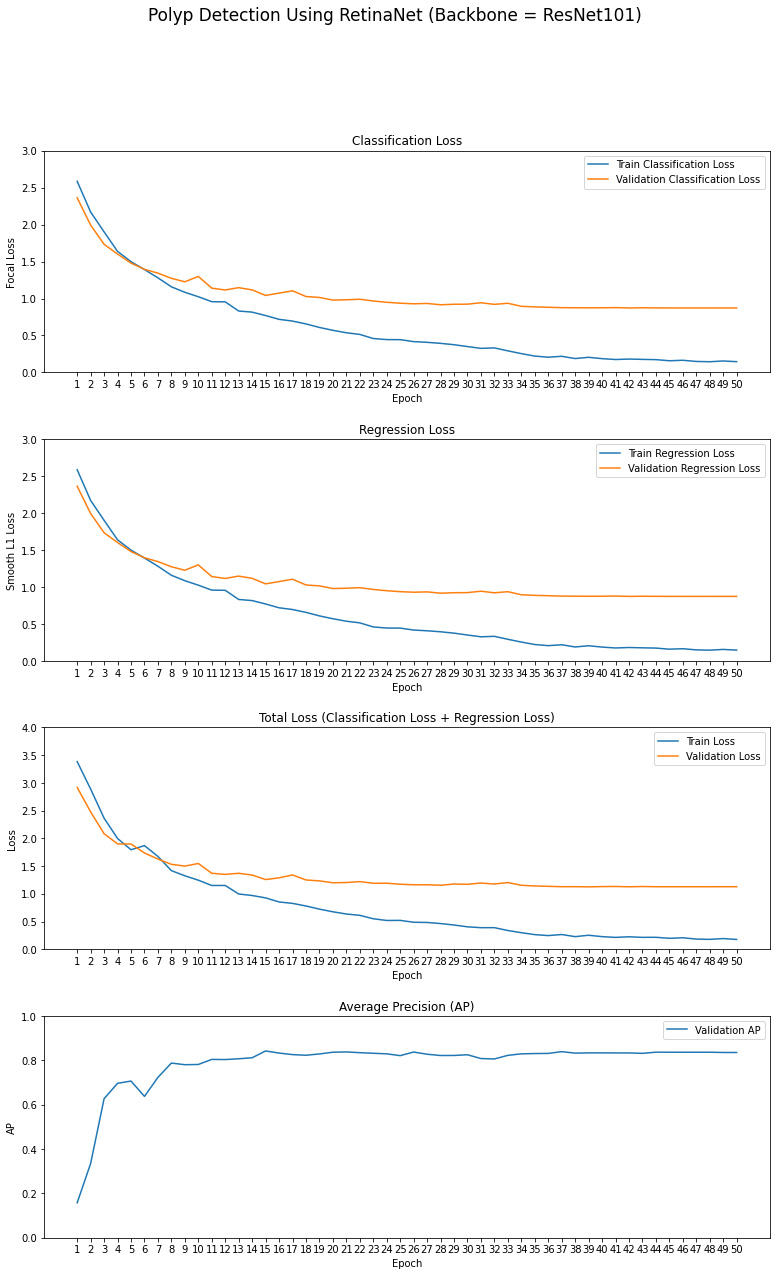

In [13]:
fig = './result/retinanet_resnet101.png'
plot_history(history, fig, 'Polyp Detection Using RetinaNet (Backbone = ResNet101)', epochs)

## With Data Augmentation

In [14]:
training_model_aug, prediction_model_aug = create_models(backbone_retinanet=backbone.retinanet,
                                          num_classes=1,
                                          weights=weights,
                                          freeze_backbone=True,
                                          lr=lr)

In [15]:
transform_generator = random_transform_generator(
            min_rotation=-0.1,
            max_rotation=0.1,
            min_scaling=(0.9, 0.9),
            max_scaling=(1.1, 1.1),
            flip_x_chance=0.5,
            flip_y_chance=0.5,
        )
visual_effect_generator = random_visual_effect_generator(
            contrast_range=(0.9, 1.1),
            brightness_range=(-.1, .1),
        )

In [16]:
train_generator_aug = CSVGenerator(
    csv_data_file='./dataset/train.csv',
    csv_class_file='./dataset/class.csv',
    no_resize = True,
    preprocess_image  = backbone.preprocess_image,
    transform_generator=transform_generator,
    visual_effect_generator=visual_effect_generator
)

In [17]:
model_path_aug = './result/retinanet_resnet101_aug.h5'
log_file_aug = './result/retinanet_resnet101_aug_log.csv'
callback_aug = create_callbacks(training_model_aug, prediction_model_aug, val_generator, model_path_aug, log_file_aug)

In [18]:
history_aug = training_model_aug.fit(
                x=train_generator_aug,
                epochs=epochs,
                verbose=1,
                validation_data=val_generator,
                callbacks=callback_aug,
                steps_per_epoch = steps
                )

Epoch 1/50
400/400 [==============================] - ETA: 0s - loss: 3.5156 - regression_loss: 2.5093 - classification_loss: 1.0063WARNING:tensorflow:Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0100s vs `on_test_batch_end` time: 0.0356s). Check your callbacks.


Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:12 Time:  0:00:12
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.0000
mAP: 0.0000

Epoch 00001: mAP improved from -inf to 0.00000, saving model to ./result\retinanet_resnet101_aug.h5
400/400 [==============================] - 57s 144ms/step - loss: 3.5156 - regression_loss: 2.5093 - classification_loss: 1.0063 - val_loss: 3.4149 - val_regression_loss: 2.3358 - val_classification_loss: 1.0791
Epoch 2/50
400/400 [==============================] - ETA: 0s - loss: 3.1839 - regression_loss: 2.1162 - classification_loss: 1.0678

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:10 Time:  0:00:10
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.0000
mAP: 0.0000

Epoch 00002: mAP did not improve from 0.00000
400/400 [==============================] - 52s 130ms/step - loss: 3.1839 - regression_loss: 2.1162 - classification_loss: 1.0678 - val_loss: 3.0400 - val_regression_loss: 1.9973 - val_classification_loss: 1.0427
Epoch 3/50
400/400 [==============================] - ETA: 0s - loss: 2.7197 - regression_loss: 1.9699 - classification_loss: 0.7498

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:11 Time:  0:00:11
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.3138
mAP: 0.3138

Epoch 00003: mAP improved from 0.00000 to 0.31381, saving model to ./result\retinanet_resnet101_aug.h5
400/400 [==============================] - 56s 140ms/step - loss: 2.7197 - regression_loss: 1.9699 - classification_loss: 0.7498 - val_loss: 2.5541 - val_regression_loss: 1.9168 - val_classification_loss: 0.6373
Epoch 4/50
400/400 [==============================] - ETA: 0s - loss: 2.3135 - regression_loss: 1.7889 - classification_loss: 0.5246

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:10 Time:  0:00:10
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.5631
mAP: 0.5631

Epoch 00004: mAP improved from 0.31381 to 0.56313, saving model to ./result\retinanet_resnet101_aug.h5
400/400 [==============================] - 53s 132ms/step - loss: 2.3135 - regression_loss: 1.7889 - classification_loss: 0.5246 - val_loss: 2.1389 - val_regression_loss: 1.7255 - val_classification_loss: 0.4133
Epoch 5/50
400/400 [==============================] - ETA: 0s - loss: 2.0419 - regression_loss: 1.6336 - classification_loss: 0.4083

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:10 Time:  0:00:10
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.6730
mAP: 0.6730

Epoch 00005: mAP improved from 0.56313 to 0.67305, saving model to ./result\retinanet_resnet101_aug.h5
400/400 [==============================] - 52s 131ms/step - loss: 2.0419 - regression_loss: 1.6336 - classification_loss: 0.4083 - val_loss: 1.9193 - val_regression_loss: 1.5608 - val_classification_loss: 0.3586
Epoch 6/50
400/400 [==============================] - ETA: 0s - loss: 1.8653 - regression_loss: 1.5160 - classification_loss: 0.3493

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:10 Time:  0:00:10
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.7135
mAP: 0.7135

Epoch 00006: mAP improved from 0.67305 to 0.71350, saving model to ./result\retinanet_resnet101_aug.h5
400/400 [==============================] - 54s 135ms/step - loss: 1.8653 - regression_loss: 1.5160 - classification_loss: 0.3493 - val_loss: 1.7414 - val_regression_loss: 1.4241 - val_classification_loss: 0.3174
Epoch 7/50
400/400 [==============================] - ETA: 0s - loss: 1.8599 - regression_loss: 1.4434 - classification_loss: 0.4165

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:10 Time:  0:00:10
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.7071
mAP: 0.7071

Epoch 00007: mAP did not improve from 0.71350
400/400 [==============================] - 50s 126ms/step - loss: 1.8599 - regression_loss: 1.4434 - classification_loss: 0.4165 - val_loss: 1.7142 - val_regression_loss: 1.4059 - val_classification_loss: 0.3083
Epoch 8/50
400/400 [==============================] - ETA: 0s - loss: 1.7366 - regression_loss: 1.3846 - classification_loss: 0.3520

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:10 Time:  0:00:10
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.7349
mAP: 0.7349

Epoch 00008: mAP improved from 0.71350 to 0.73489, saving model to ./result\retinanet_resnet101_aug.h5
400/400 [==============================] - 53s 132ms/step - loss: 1.7366 - regression_loss: 1.3846 - classification_loss: 0.3520 - val_loss: 1.7745 - val_regression_loss: 1.4593 - val_classification_loss: 0.3152
Epoch 9/50
400/400 [==============================] - ETA: 0s - loss: 1.6544 - regression_loss: 1.3370 - classification_loss: 0.3174

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:10 Time:  0:00:10
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.7916
mAP: 0.7916

Epoch 00009: mAP improved from 0.73489 to 0.79158, saving model to ./result\retinanet_resnet101_aug.h5
400/400 [==============================] - 53s 132ms/step - loss: 1.6544 - regression_loss: 1.3370 - classification_loss: 0.3174 - val_loss: 1.6883 - val_regression_loss: 1.3793 - val_classification_loss: 0.3090
Epoch 10/50
400/400 [==============================] - ETA: 0s - loss: 1.6117 - regression_loss: 1.2980 - classification_loss: 0.3137

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:10 Time:  0:00:10
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.7389
mAP: 0.7389

Epoch 00010: mAP did not improve from 0.79158
400/400 [==============================] - 50s 126ms/step - loss: 1.6117 - regression_loss: 1.2980 - classification_loss: 0.3137 - val_loss: 1.5775 - val_regression_loss: 1.2646 - val_classification_loss: 0.3129
Epoch 11/50
400/400 [==============================] - ETA: 0s - loss: 1.5566 - regression_loss: 1.2796 - classification_loss: 0.2770

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:10 Time:  0:00:10
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.7900
mAP: 0.7900

Epoch 00011: mAP did not improve from 0.79158
400/400 [==============================] - 50s 125ms/step - loss: 1.5566 - regression_loss: 1.2796 - classification_loss: 0.2770 - val_loss: 1.6096 - val_regression_loss: 1.3534 - val_classification_loss: 0.2561
Epoch 12/50
400/400 [==============================] - ETA: 0s - loss: 1.4768 - regression_loss: 1.2116 - classification_loss: 0.2652

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:10 Time:  0:00:10
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8051
mAP: 0.8051

Epoch 00012: mAP improved from 0.79158 to 0.80509, saving model to ./result\retinanet_resnet101_aug.h5
400/400 [==============================] - 52s 130ms/step - loss: 1.4768 - regression_loss: 1.2116 - classification_loss: 0.2652 - val_loss: 1.5706 - val_regression_loss: 1.3281 - val_classification_loss: 0.2426
Epoch 13/50
400/400 [==============================] - ETA: 0s - loss: 1.4269 - regression_loss: 1.1434 - classification_loss: 0.2834

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:10 Time:  0:00:10
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.7948
mAP: 0.7948

Epoch 00013: mAP did not improve from 0.80509
400/400 [==============================] - 50s 125ms/step - loss: 1.4269 - regression_loss: 1.1434 - classification_loss: 0.2834 - val_loss: 1.4457 - val_regression_loss: 1.1919 - val_classification_loss: 0.2538
Epoch 14/50
400/400 [==============================] - ETA: 0s - loss: 1.4675 - regression_loss: 1.2018 - classification_loss: 0.2656

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:10 Time:  0:00:10
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8030
mAP: 0.8030

Epoch 00014: mAP did not improve from 0.80509
400/400 [==============================] - 50s 125ms/step - loss: 1.4675 - regression_loss: 1.2018 - classification_loss: 0.2656 - val_loss: 1.4721 - val_regression_loss: 1.2084 - val_classification_loss: 0.2637
Epoch 15/50
400/400 [==============================] - ETA: 0s - loss: 1.3785 - regression_loss: 1.1478 - classification_loss: 0.2307

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:10 Time:  0:00:10
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8040
mAP: 0.8040

Epoch 00015: mAP did not improve from 0.80509
400/400 [==============================] - 50s 125ms/step - loss: 1.3785 - regression_loss: 1.1478 - classification_loss: 0.2307 - val_loss: 1.5168 - val_regression_loss: 1.2800 - val_classification_loss: 0.2368
Epoch 16/50
400/400 [==============================] - ETA: 0s - loss: 1.3040 - regression_loss: 1.0830 - classification_loss: 0.2210

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:10 Time:  0:00:10
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8382
mAP: 0.8382

Epoch 00016: mAP improved from 0.80509 to 0.83821, saving model to ./result\retinanet_resnet101_aug.h5
400/400 [==============================] - 54s 135ms/step - loss: 1.3040 - regression_loss: 1.0830 - classification_loss: 0.2210 - val_loss: 1.4560 - val_regression_loss: 1.2223 - val_classification_loss: 0.2338
Epoch 17/50
400/400 [==============================] - ETA: 0s - loss: 1.2998 - regression_loss: 1.0814 - classification_loss: 0.2184

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:10 Time:  0:00:10
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8188
mAP: 0.8188

Epoch 00017: mAP did not improve from 0.83821
400/400 [==============================] - 52s 130ms/step - loss: 1.2998 - regression_loss: 1.0814 - classification_loss: 0.2184 - val_loss: 1.6126 - val_regression_loss: 1.2832 - val_classification_loss: 0.3294
Epoch 18/50
400/400 [==============================] - ETA: 0s - loss: 1.2680 - regression_loss: 1.0555 - classification_loss: 0.2125

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:10 Time:  0:00:10
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8125
mAP: 0.8125

Epoch 00018: mAP did not improve from 0.83821
400/400 [==============================] - 52s 130ms/step - loss: 1.2680 - regression_loss: 1.0555 - classification_loss: 0.2125 - val_loss: 1.3220 - val_regression_loss: 1.0875 - val_classification_loss: 0.2345
Epoch 19/50
400/400 [==============================] - ETA: 0s - loss: 1.2361 - regression_loss: 1.0420 - classification_loss: 0.1941

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:10 Time:  0:00:10
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8129
mAP: 0.8129

Epoch 00019: mAP did not improve from 0.83821
400/400 [==============================] - 50s 125ms/step - loss: 1.2361 - regression_loss: 1.0420 - classification_loss: 0.1941 - val_loss: 1.4625 - val_regression_loss: 1.2240 - val_classification_loss: 0.2384
Epoch 20/50
400/400 [==============================] - ETA: 0s - loss: 1.3265 - regression_loss: 1.0974 - classification_loss: 0.2291

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:10 Time:  0:00:10
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8242
mAP: 0.8242

Epoch 00020: mAP did not improve from 0.83821
400/400 [==============================] - 50s 125ms/step - loss: 1.3265 - regression_loss: 1.0974 - classification_loss: 0.2291 - val_loss: 1.4217 - val_regression_loss: 1.1799 - val_classification_loss: 0.2418
Epoch 21/50
400/400 [==============================] - ETA: 0s - loss: 1.2280 - regression_loss: 1.0171 - classification_loss: 0.2109

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:10 Time:  0:00:10
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8358
mAP: 0.8358

Epoch 00021: mAP did not improve from 0.83821
400/400 [==============================] - 50s 125ms/step - loss: 1.2280 - regression_loss: 1.0171 - classification_loss: 0.2109 - val_loss: 1.4823 - val_regression_loss: 1.2665 - val_classification_loss: 0.2157
Epoch 22/50
400/400 [==============================] - ETA: 0s - loss: 1.1923 - regression_loss: 0.9889 - classification_loss: 0.2034

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:11 Time:  0:00:11
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8332
mAP: 0.8332

Epoch 00022: mAP did not improve from 0.83821
400/400 [==============================] - 53s 133ms/step - loss: 1.1923 - regression_loss: 0.9889 - classification_loss: 0.2034 - val_loss: 1.3456 - val_regression_loss: 1.1248 - val_classification_loss: 0.2208
Epoch 23/50
400/400 [==============================] - ETA: 0s - loss: 1.2584 - regression_loss: 1.0273 - classification_loss: 0.2310

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:10 Time:  0:00:10
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8299
mAP: 0.8299

Epoch 00023: mAP did not improve from 0.83821

Epoch 00023: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
400/400 [==============================] - 52s 130ms/step - loss: 1.2584 - regression_loss: 1.0273 - classification_loss: 0.2310 - val_loss: 1.3336 - val_regression_loss: 1.0826 - val_classification_loss: 0.2510
Epoch 24/50
400/400 [==============================] - ETA: 0s - loss: 1.0864 - regression_loss: 0.9023 - classification_loss: 0.1840

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:10 Time:  0:00:10
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8426
mAP: 0.8426

Epoch 00024: mAP improved from 0.83821 to 0.84263, saving model to ./result\retinanet_resnet101_aug.h5
400/400 [==============================] - 54s 135ms/step - loss: 1.0864 - regression_loss: 0.9023 - classification_loss: 0.1840 - val_loss: 1.2247 - val_regression_loss: 1.0179 - val_classification_loss: 0.2069
Epoch 25/50
400/400 [==============================] - ETA: 0s - loss: 1.0273 - regression_loss: 0.8530 - classification_loss: 0.1743

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:10 Time:  0:00:10
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8409
mAP: 0.8409

Epoch 00025: mAP did not improve from 0.84263
400/400 [==============================] - 50s 125ms/step - loss: 1.0273 - regression_loss: 0.8530 - classification_loss: 0.1743 - val_loss: 1.2098 - val_regression_loss: 1.0023 - val_classification_loss: 0.2074
Epoch 26/50
400/400 [==============================] - ETA: 0s - loss: 1.0560 - regression_loss: 0.8775 - classification_loss: 0.1786

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:10 Time:  0:00:10
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8436
mAP: 0.8436

Epoch 00026: mAP improved from 0.84263 to 0.84358, saving model to ./result\retinanet_resnet101_aug.h5
400/400 [==============================] - 53s 131ms/step - loss: 1.0560 - regression_loss: 0.8775 - classification_loss: 0.1786 - val_loss: 1.2435 - val_regression_loss: 1.0361 - val_classification_loss: 0.2074
Epoch 27/50
400/400 [==============================] - ETA: 0s - loss: 1.0073 - regression_loss: 0.8335 - classification_loss: 0.1738

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:10 Time:  0:00:10
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8427
mAP: 0.8427

Epoch 00027: mAP did not improve from 0.84358
400/400 [==============================] - 50s 125ms/step - loss: 1.0073 - regression_loss: 0.8335 - classification_loss: 0.1738 - val_loss: 1.2487 - val_regression_loss: 1.0431 - val_classification_loss: 0.2056
Epoch 28/50
400/400 [==============================] - ETA: 0s - loss: 1.0711 - regression_loss: 0.8808 - classification_loss: 0.1902

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:11 Time:  0:00:11
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8478
mAP: 0.8478

Epoch 00028: mAP improved from 0.84358 to 0.84778, saving model to ./result\retinanet_resnet101_aug.h5
400/400 [==============================] - 53s 134ms/step - loss: 1.0711 - regression_loss: 0.8808 - classification_loss: 0.1902 - val_loss: 1.2410 - val_regression_loss: 1.0356 - val_classification_loss: 0.2054
Epoch 29/50
400/400 [==============================] - ETA: 0s - loss: 1.0302 - regression_loss: 0.8556 - classification_loss: 0.1746

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:11 Time:  0:00:11
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8459
mAP: 0.8459

Epoch 00029: mAP did not improve from 0.84778
400/400 [==============================] - 51s 127ms/step - loss: 1.0302 - regression_loss: 0.8556 - classification_loss: 0.1746 - val_loss: 1.2075 - val_regression_loss: 1.0020 - val_classification_loss: 0.2055
Epoch 30/50
400/400 [==============================] - ETA: 0s - loss: 1.0085 - regression_loss: 0.8333 - classification_loss: 0.1752

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:10 Time:  0:00:10
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8441
mAP: 0.8441

Epoch 00030: mAP did not improve from 0.84778
400/400 [==============================] - 50s 125ms/step - loss: 1.0085 - regression_loss: 0.8333 - classification_loss: 0.1752 - val_loss: 1.2015 - val_regression_loss: 0.9952 - val_classification_loss: 0.2063
Epoch 31/50
400/400 [==============================] - ETA: 0s - loss: 0.9769 - regression_loss: 0.8069 - classification_loss: 0.1700

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:10 Time:  0:00:10
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8481
mAP: 0.8481

Epoch 00031: mAP improved from 0.84778 to 0.84812, saving model to ./result\retinanet_resnet101_aug.h5
400/400 [==============================] - 53s 132ms/step - loss: 0.9769 - regression_loss: 0.8069 - classification_loss: 0.1700 - val_loss: 1.2308 - val_regression_loss: 1.0266 - val_classification_loss: 0.2042
Epoch 32/50
400/400 [==============================] - ETA: 0s - loss: 0.9727 - regression_loss: 0.7984 - classification_loss: 0.1742

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:10 Time:  0:00:10
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8456
mAP: 0.8456

Epoch 00032: mAP did not improve from 0.84812
400/400 [==============================] - 50s 125ms/step - loss: 0.9727 - regression_loss: 0.7984 - classification_loss: 0.1742 - val_loss: 1.2192 - val_regression_loss: 1.0160 - val_classification_loss: 0.2032
Epoch 33/50
400/400 [==============================] - ETA: 0s - loss: 0.9659 - regression_loss: 0.7986 - classification_loss: 0.1673

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:10 Time:  0:00:10
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8455
mAP: 0.8455

Epoch 00033: mAP did not improve from 0.84812
400/400 [==============================] - 50s 126ms/step - loss: 0.9659 - regression_loss: 0.7986 - classification_loss: 0.1673 - val_loss: 1.2189 - val_regression_loss: 1.0162 - val_classification_loss: 0.2026
Epoch 34/50
400/400 [==============================] - ETA: 0s - loss: 0.9701 - regression_loss: 0.8030 - classification_loss: 0.1671

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:10 Time:  0:00:10
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8458
mAP: 0.8458

Epoch 00034: mAP did not improve from 0.84812
400/400 [==============================] - 50s 125ms/step - loss: 0.9701 - regression_loss: 0.8030 - classification_loss: 0.1671 - val_loss: 1.1947 - val_regression_loss: 0.9930 - val_classification_loss: 0.2016
Epoch 35/50
400/400 [==============================] - ETA: 0s - loss: 0.9985 - regression_loss: 0.8190 - classification_loss: 0.1795

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:10 Time:  0:00:10
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8432
mAP: 0.8432

Epoch 00035: mAP did not improve from 0.84812
400/400 [==============================] - 50s 125ms/step - loss: 0.9985 - regression_loss: 0.8190 - classification_loss: 0.1795 - val_loss: 1.2058 - val_regression_loss: 1.0038 - val_classification_loss: 0.2019
Epoch 36/50
400/400 [==============================] - ETA: 0s - loss: 0.9856 - regression_loss: 0.8051 - classification_loss: 0.1804

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:10 Time:  0:00:10
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8489
mAP: 0.8489

Epoch 00036: mAP improved from 0.84812 to 0.84887, saving model to ./result\retinanet_resnet101_aug.h5
400/400 [==============================] - 52s 130ms/step - loss: 0.9856 - regression_loss: 0.8051 - classification_loss: 0.1804 - val_loss: 1.2322 - val_regression_loss: 1.0306 - val_classification_loss: 0.2015
Epoch 37/50
400/400 [==============================] - ETA: 0s - loss: 0.9392 - regression_loss: 0.7761 - classification_loss: 0.1631

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:11 Time:  0:00:11
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8518
mAP: 0.8518

Epoch 00037: mAP improved from 0.84887 to 0.85179, saving model to ./result\retinanet_resnet101_aug.h5
400/400 [==============================] - 55s 138ms/step - loss: 0.9392 - regression_loss: 0.7761 - classification_loss: 0.1631 - val_loss: 1.2127 - val_regression_loss: 1.0132 - val_classification_loss: 0.1995
Epoch 38/50
400/400 [==============================] - ETA: 0s - loss: 0.9784 - regression_loss: 0.8021 - classification_loss: 0.1763

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:10 Time:  0:00:10
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8487
mAP: 0.8487

Epoch 00038: mAP did not improve from 0.85179
400/400 [==============================] - 51s 127ms/step - loss: 0.9784 - regression_loss: 0.8021 - classification_loss: 0.1763 - val_loss: 1.2222 - val_regression_loss: 1.0209 - val_classification_loss: 0.2013
Epoch 39/50
400/400 [==============================] - ETA: 0s - loss: 0.9778 - regression_loss: 0.8049 - classification_loss: 0.1728

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:10 Time:  0:00:10
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8493
mAP: 0.8493

Epoch 00039: mAP did not improve from 0.85179

Epoch 00039: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
400/400 [==============================] - 50s 125ms/step - loss: 0.9778 - regression_loss: 0.8049 - classification_loss: 0.1728 - val_loss: 1.2247 - val_regression_loss: 1.0233 - val_classification_loss: 0.2014
Epoch 40/50
400/400 [==============================] - ETA: 0s - loss: 0.9451 - regression_loss: 0.7811 - classification_loss: 0.1640

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:10 Time:  0:00:10
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8498
mAP: 0.8498

Epoch 00040: mAP did not improve from 0.85179
400/400 [==============================] - 50s 125ms/step - loss: 0.9451 - regression_loss: 0.7811 - classification_loss: 0.1640 - val_loss: 1.2141 - val_regression_loss: 1.0126 - val_classification_loss: 0.2015
Epoch 41/50
400/400 [==============================] - ETA: 0s - loss: 1.0008 - regression_loss: 0.8254 - classification_loss: 0.1753

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:10 Time:  0:00:10
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8497
mAP: 0.8497

Epoch 00041: mAP did not improve from 0.85179
400/400 [==============================] - 50s 126ms/step - loss: 1.0008 - regression_loss: 0.8254 - classification_loss: 0.1753 - val_loss: 1.2041 - val_regression_loss: 1.0026 - val_classification_loss: 0.2015
Epoch 42/50
400/400 [==============================] - ETA: 0s - loss: 0.9617 - regression_loss: 0.7950 - classification_loss: 0.1668

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:10 Time:  0:00:10
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8497
mAP: 0.8497

Epoch 00042: mAP did not improve from 0.85179
400/400 [==============================] - 50s 125ms/step - loss: 0.9617 - regression_loss: 0.7950 - classification_loss: 0.1668 - val_loss: 1.2009 - val_regression_loss: 1.0003 - val_classification_loss: 0.2005
Epoch 43/50
400/400 [==============================] - ETA: 0s - loss: 0.9322 - regression_loss: 0.7716 - classification_loss: 0.1607

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:10 Time:  0:00:10
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8503
mAP: 0.8503

Epoch 00043: mAP did not improve from 0.85179
400/400 [==============================] - 50s 125ms/step - loss: 0.9322 - regression_loss: 0.7716 - classification_loss: 0.1607 - val_loss: 1.2018 - val_regression_loss: 1.0012 - val_classification_loss: 0.2006
Epoch 44/50
400/400 [==============================] - ETA: 0s - loss: 0.9740 - regression_loss: 0.8112 - classification_loss: 0.1628

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:10 Time:  0:00:10
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8522
mAP: 0.8522

Epoch 00044: mAP improved from 0.85179 to 0.85220, saving model to ./result\retinanet_resnet101_aug.h5

Epoch 00044: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
400/400 [==============================] - 53s 133ms/step - loss: 0.9740 - regression_loss: 0.8112 - classification_loss: 0.1628 - val_loss: 1.1991 - val_regression_loss: 0.9989 - val_classification_loss: 0.2001
Epoch 45/50
400/400 [==============================] - ETA: 0s - loss: 0.9918 - regression_loss: 0.8144 - classification_loss: 0.1774

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:10 Time:  0:00:10
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8520
mAP: 0.8520

Epoch 00045: mAP did not improve from 0.85220
400/400 [==============================] - 50s 125ms/step - loss: 0.9918 - regression_loss: 0.8144 - classification_loss: 0.1774 - val_loss: 1.1975 - val_regression_loss: 0.9973 - val_classification_loss: 0.2002
Epoch 46/50
400/400 [==============================] - ETA: 0s - loss: 0.9689 - regression_loss: 0.7985 - classification_loss: 0.1705

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:10 Time:  0:00:10
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8525
mAP: 0.8525

Epoch 00046: mAP improved from 0.85220 to 0.85249, saving model to ./result\retinanet_resnet101_aug.h5
400/400 [==============================] - 52s 131ms/step - loss: 0.9689 - regression_loss: 0.7985 - classification_loss: 0.1705 - val_loss: 1.1970 - val_regression_loss: 0.9968 - val_classification_loss: 0.2002
Epoch 47/50
400/400 [==============================] - ETA: 0s - loss: 0.9997 - regression_loss: 0.8202 - classification_loss: 0.1795

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:10 Time:  0:00:10
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8524
mAP: 0.8524

Epoch 00047: mAP did not improve from 0.85249
400/400 [==============================] - 50s 125ms/step - loss: 0.9997 - regression_loss: 0.8202 - classification_loss: 0.1795 - val_loss: 1.1964 - val_regression_loss: 0.9962 - val_classification_loss: 0.2002
Epoch 48/50
400/400 [==============================] - ETA: 0s - loss: 0.9611 - regression_loss: 0.7892 - classification_loss: 0.1719

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:10 Time:  0:00:10
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8525
mAP: 0.8525

Epoch 00048: mAP did not improve from 0.85249
400/400 [==============================] - 50s 125ms/step - loss: 0.9611 - regression_loss: 0.7892 - classification_loss: 0.1719 - val_loss: 1.1976 - val_regression_loss: 0.9974 - val_classification_loss: 0.2002
Epoch 49/50
400/400 [==============================] - ETA: 0s - loss: 0.9544 - regression_loss: 0.7843 - classification_loss: 0.1701

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:10 Time:  0:00:10
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8524
mAP: 0.8524

Epoch 00049: mAP did not improve from 0.85249

Epoch 00049: ReduceLROnPlateau reducing learning rate to 1.0000001111620805e-07.
400/400 [==============================] - 50s 125ms/step - loss: 0.9544 - regression_loss: 0.7843 - classification_loss: 0.1701 - val_loss: 1.1967 - val_regression_loss: 0.9966 - val_classification_loss: 0.2001
Epoch 50/50
400/400 [==============================] - ETA: 0s - loss: 0.9759 - regression_loss: 0.8074 - classification_loss: 0.1685

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:10 Time:  0:00:10
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8524
mAP: 0.8524

Epoch 00050: mAP did not improve from 0.85249
400/400 [==============================] - 50s 125ms/step - loss: 0.9759 - regression_loss: 0.8074 - classification_loss: 0.1685 - val_loss: 1.1967 - val_regression_loss: 0.9966 - val_classification_loss: 0.2001


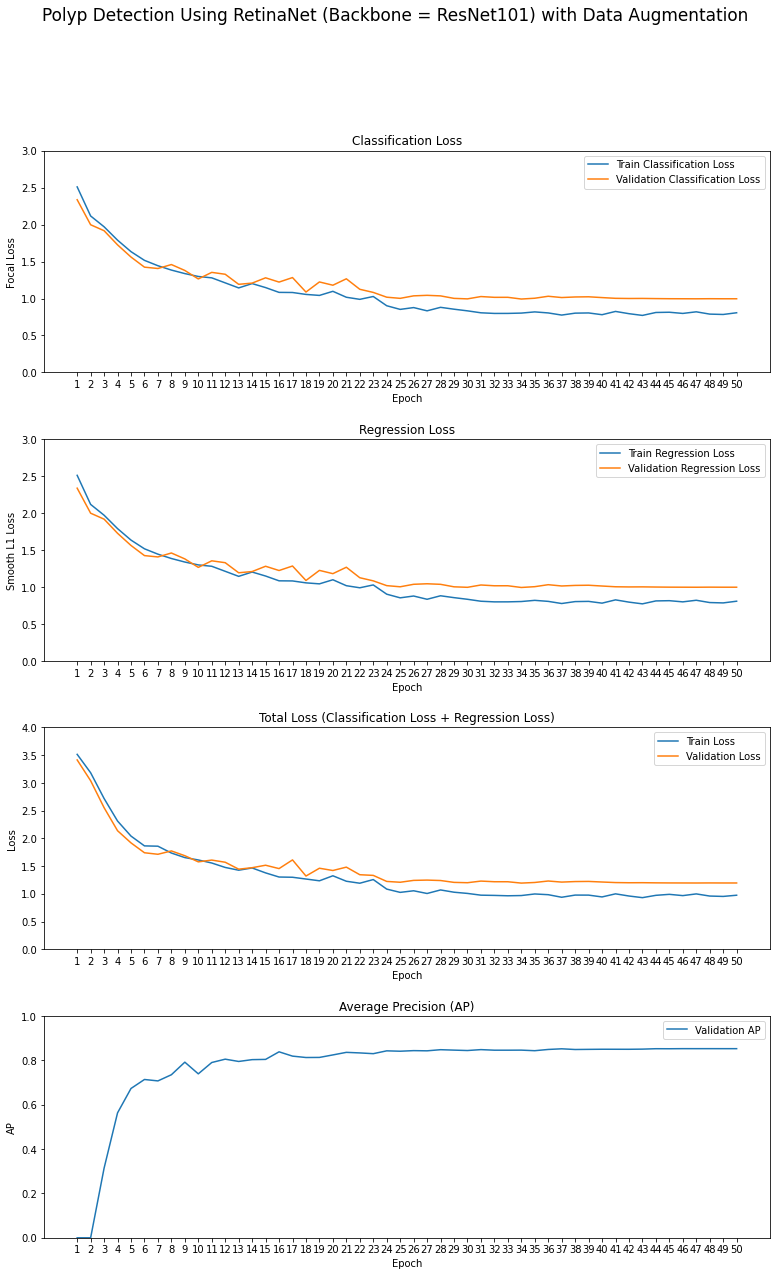

In [19]:
fig = './result/retinanet_resnet101_aug.png'
plot_history(history_aug, fig, 'Polyp Detection Using RetinaNet (Backbone = ResNet101) with Data Augmentation', epochs)